In [88]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle
import cv2

In [94]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal try\\images\\Train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal try\\images\\Validation",
    target_size=(224, 224), 
    batch_size=32,
    class_mode='categorical')

Found 463 images belonging to 3 classes.
Found 110 images belonging to 3 classes.


In [95]:
model = Sequential([
    Conv2D(96, (11, 11), activation='relu', strides=4, padding='valid', input_shape=(224, 224, 3)),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(256, (5, 5), strides=1, padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(384, (3, 3), strides=1, padding='same', activation='relu'),
    Conv2D(384, (3, 3), strides=1, padding='same', activation='relu'),
    Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(3, activation='softmax'),
])

In [96]:
Model_Checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'AlexNetmodelsave.h5',
    monitor='val_accuracy',
    save_best_only='True',
    verbose=1
)

In [97]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/350
15/15 [==============================] - ETA: 0s - loss: 1.3918 - accuracy: 0.4212
Epoch 1: val_accuracy improved from -inf to 0.49091, saving model to AlexNetmodelsave.h5
15/15 [==============================] - 17s 1s/step - loss: 1.3918 - accuracy: 0.4212 - val_loss: 0.9290 - val_accuracy: 0.4909
Epoch 2/350
15/15 [==============================] - ETA: 0s - loss: 0.9091 - accuracy: 0.4665
Epoch 2: val_accuracy did not improve from 0.49091
15/15 [==============================] - 13s 862ms/step - loss: 0.9091 - accuracy: 0.4665 - val_loss: 0.9153 - val_accuracy: 0.2545
Epoch 3/350
15/15 [==============================] - ETA: 0s - loss: 0.8739 - accuracy: 0.4600
Epoch 3: val_accuracy improved from 0.49091 to 0.61818, saving model to AlexNetmodelsave.h5
15/15 [==============================] - 16s 1s/step - loss: 0.8739 - accuracy: 0.4600 - val_loss: 0.7510 - val_accuracy: 0.6182
Epoch 4/350
15/15 [==============================] - ETA: 0s - loss: 0.7918 - accuracy: 0.520

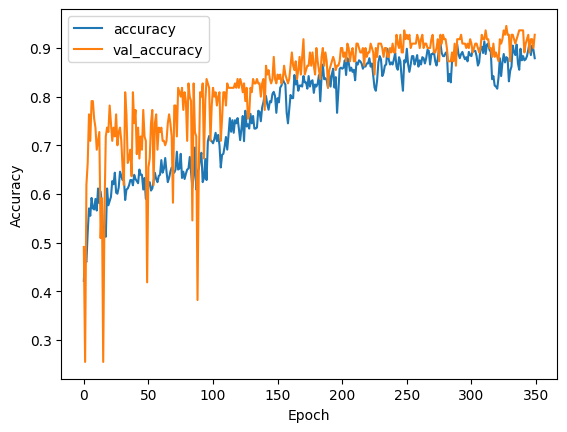

In [98]:
history = model.fit(
    train_generator,
    epochs=350,
    validation_data=validation_generator,
    batch_size=32,
    callbacks=[Model_Checkpoint])

with open('AlexNettraining_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

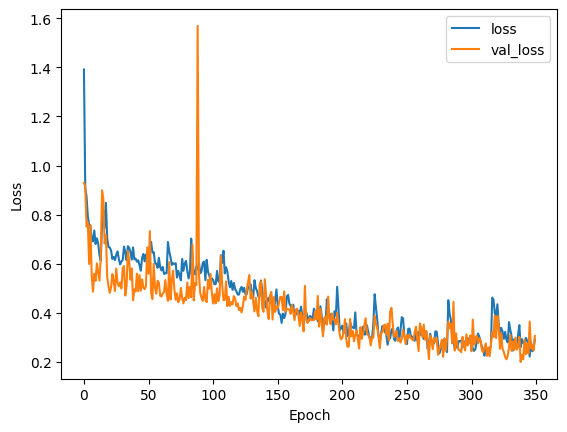

In [99]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [108]:
model = tf.keras.models.load_model('AlexNetmodelsave.h5')

In [109]:
test_generator = test_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal Try\\images\\Test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)


test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')
print(f'Test loss: {test_loss:.4f}')

Found 70 images belonging to 3 classes.


3/3 [==============================] - 1s 89ms/step - loss: 0.3746 - accuracy: 0.9429
Test accuracy: 94.29%
Test loss: 0.3746


In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_generator.reset()
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

3/3 [==============================] - 0s 91ms/step


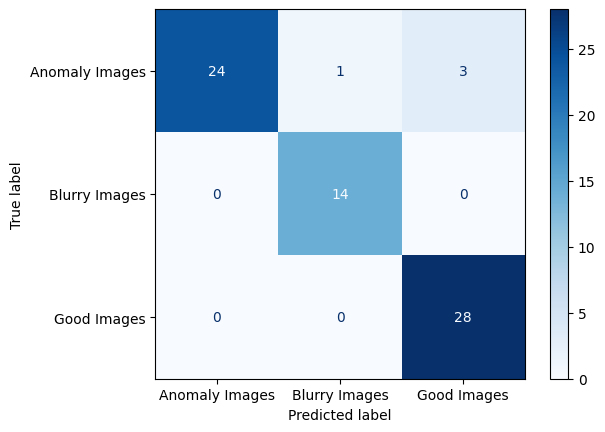

In [111]:
labels = list(test_generator.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()